### A catalogue of the Chandra Deep Field South with multi-colour classi- fication and photometric redshifts from COMBO-17

C. Wolf et al. 2004, Astron. & Astrophys.
http://www.mpia.de/COMBO/combo_index.html

#### A Multivariate Analsysis

#### Dataset:
- 65 variables: Rmag, e.Rmag, ApDRmag, mu- max, Mcz, e.Mcz, MCzml, ..., IFD, e.IFD
- 63,501 objects in total: galaxies 
- Dataset (subset) from http://astrostatistics.psu.edu/datasets/COMBO17.dat

#### Aim of the notebook:

We will perform the following analysis steps:

- Generalized univariate statistical methods: 
    - Multivariate means, variances, and covariances 
    - Multivariate probability distributions
- Reduce the number of variables:
    - Structural simplification
    - Linear functions of variables (principal components)
- Investigate the dependence between variables:
    - Canonical correlations
- Statistical inference:
    - Estimation
    - Confidence regions
    - Hypothesis testing
- Classification and clustering:
    - Discriminant analysis
    - Cluster analysis
- Prediction:
    - Multiple regression
    - Multivariate regression

In [1]:
print(__doc__)
import numpy as np
import pandas as pd
# PCA and Factor Analysis
from sklearn.decomposition import PCA,FactorAnalysis
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.preprocessing import StandardScaler
# K-mean algorithm
from sklearn.cluster import KMeans
# Local Outlier Factor
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from scipy.stats import rv_discrete
from scipy.stats import spearmanr,ks_2samp, chi2_contingency, anderson
from scipy.stats import probplot
np.random.seed(42)

Automatically created module for IPython interactive environment


In [2]:
# Read the data in csv format
df=pd.read_csv('COMBO17.csv', header=0)
# List the objects
df.head()

,Nr,Rmag,e.Rmag,ApDRmag,mumax,Mcz,e.Mcz,MCzml,chi2red,UjMAG,...,UFS,e.UFS,BFS,e.BFS,VFD,e.VFD,RFS,e.RFS,IFD,e.IFD
0,6,24.995,0.097,0.935,24.214,0.832,0.036,1.400,0.64,-17.67,...,0.01870,0.00239,0.01630,0.00129,0.017300,0.00141,0.01650,0.000434,0.02470,0.00483
1,9,25.013,0.181,-0.135,25.303,0.927,0.122,0.864,0.41,-18.28,...,0.00706,0.00238,0.00420,0.00115,0.003930,0.00182,0.00723,0.000500,0.00973,0.00460
2,16,24.246,0.054,0.821,23.511,1.202,0.037,1.217,0.92,-19.75,...,0.01260,0.00184,0.01830,0.00115,0.018800,0.00167,0.02880,0.000655,0.05700,0.00465
3,21,25.203,0.128,0.639,24.948,0.912,0.177,0.776,0.39,-17.83,...,0.01410,0.00186,0.01180,0.00110,0.009670,0.00204,0.01050,0.000416,0.01340,0.00330
4,26,25.504,0.112,-1.588,24.934,0.848,0.067,1.330,1.45,-17.69,...,0.00514,0.00170,0.00102,0.00127,0.000039,0.00160,0.00139,0.000499,0.00590,0.00444


In [3]:
# select 8 columns
df_1=df[['Rmag', 'mumax', 'Mcz', 'MCzml', 'chi2red', 'UjMAG', 
         'BjMAG', 'VjMAG']]

In [4]:
df_1.head()

,Rmag,mumax,Mcz,MCzml,chi2red,UjMAG,BjMAG,VjMAG
0,24.995,24.214,0.832,1.400,0.64,-17.67,-17.54,-17.76
1,25.013,25.303,0.927,0.864,0.41,-18.28,17.86,-18.20
2,24.246,23.511,1.202,1.217,0.92,-19.75,-19.91,-20.41
3,25.203,24.948,0.912,0.776,0.39,-17.83,-17.39,-17.67
4,25.504,24.934,0.848,1.330,1.45,-17.69,-18.40,-19.37


In [5]:
# Summary statistics
df_1.describe()

,Rmag,mumax,Mcz,MCzml,chi2red,UjMAG,BjMAG,VjMAG
count,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000
mean,23.939266,24.181846,0.728503,0.770000,1.167392,-17.866005,-17.749131,-18.113235
std,1.435899,1.017225,0.319010,0.375989,0.682852,1.965501,2.121378,2.091646
min,16.572000,18.112000,0.007000,0.000000,0.140000,-23.210000,-23.150000,-23.620000
25%,23.099000,23.624250,0.519000,0.502250,0.730000,-19.070000,-19.010000,-19.420000
50%,24.073500,24.387500,0.810000,0.826500,1.020000,-18.210000,-18.130000,-18.460000
75%,25.029750,24.957500,0.981750,1.024750,1.440000,-17.300000,-17.060000,-17.412500
max,27.000000,25.833000,1.379000,1.400000,11.910000,-7.910000,17.860000,-7.830000


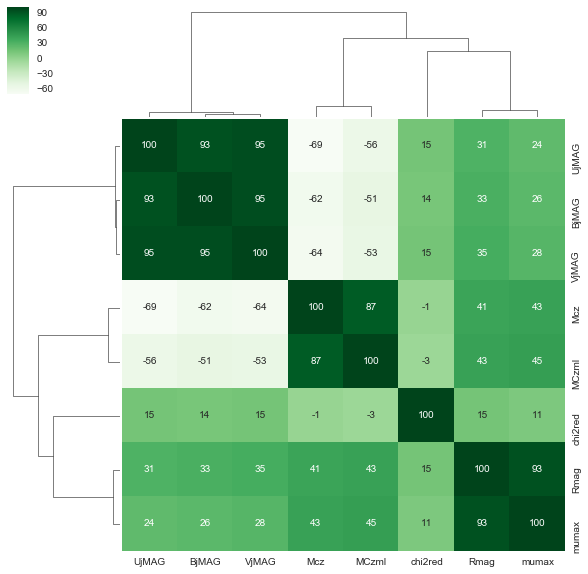

In [6]:
corr = df_1.corr().mul(100).astype(int)
sns.clustermap(data=corr, annot=True, fmt='d', cmap='Greens')
plt.show()

Strong correlations are found for:
- UjMAG, BjMAG, and VjMag 
- Mcx and MCzml are correlated
- Rmag and mumax

Correlations measure the strengths of linear relationships between variables if such relationships are valid.

We perform a Principle Component Analysis of all the variables excluding the errors

In [7]:
# Select the columns by removing the erros and remove the instances 
# (objects) with NaN
df_2 = df[['Rmag','ApDRmag','mumax','Mcz','MCzml','chi2red',
           'UjMAG','BjMAG','VjMAG','usMAG','gsMAG','rsMAG','UbMAG','BbMAG','VnMAG','S280MAG','W420FE','W462FE','W485FD','W518FE','W571FS','W604FE','W646FD','W696FE','W753FE','W815FS','W856FD','W914FD','W914FE','UFS','BFS','VFD','RFS','IFD']]
df_2 = df_2.dropna()
df_2.head()

,Rmag,ApDRmag,mumax,Mcz,MCzml,chi2red,UjMAG,BjMAG,VjMAG,usMAG,...,W753FE,W815FS,W856FD,W914FD,W914FE,UFS,BFS,VFD,RFS,IFD
0,24.995,0.935,24.214,0.832,1.400,0.64,-17.67,-17.54,-17.76,-17.83,...,0.02450,0.02160,0.02440,0.0377,0.01170,0.01870,0.01630,0.017300,0.01650,0.02470
1,25.013,-0.135,25.303,0.927,0.864,0.41,-18.28,17.86,-18.20,-18.42,...,0.01420,0.01470,0.01140,0.0103,0.02630,0.00706,0.00420,0.003930,0.00723,0.00973
2,24.246,0.821,23.511,1.202,1.217,0.92,-19.75,-19.91,-20.41,-19.87,...,0.03540,0.04530,0.07810,0.0711,0.06410,0.01260,0.01830,0.018800,0.02880,0.05700
3,25.203,0.639,24.948,0.912,0.776,0.39,-17.83,-17.39,-17.67,-17.98,...,0.00225,0.01690,0.00875,0.0070,0.00587,0.01410,0.01180,0.009670,0.01050,0.01340
4,25.504,-1.588,24.934,0.848,1.330,1.45,-17.69,-18.40,-19.37,-17.81,...,0.01620,0.00676,0.01020,0.0133,0.01990,0.00514,0.00102,0.000039,0.00139,0.00590


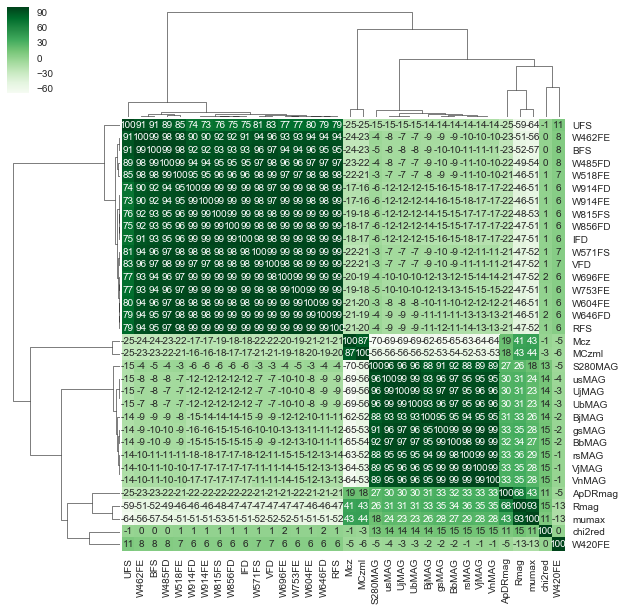

In [8]:
corr = df_2.corr().mul(100).astype(int)
clustergrid = sns.clustermap(data=corr, annot=True, fmt='d',
                             cmap='Greens')
plt.show()

In [9]:
idx=clustergrid.dendrogram_col.reordered_ind
df_g1=df_2.iloc[:,idx[0:17]]
df_g2=df_2.iloc[:,idx[17:19]]
df_g3=df_2.iloc[:,idx[19:29]] # The colors are highly correlated
df_g4=df_2.iloc[:,idx[29:32]]
df_g5=df_2.iloc[:,idx[32:35]]

In [10]:
X_g1 = np.array(df_g1)
pca_g1=PCA()
pca_g1.fit(X_g1)
Xpca_g1 = pca_g1.transform(X_g1)
pca_components_g1=pd.DataFrame(pca_g1.components_)
pca_explained_variance_g1=pd.DataFrame(pca_g1.explained_variance_ratio_*100.)
pca_explained_variance_g1

,0
0,98.833368
1,0.837664
2,0.112759
3,0.052404
4,0.039643
5,0.027057
6,0.019793
7,0.018710
8,0.015156
9,0.011173


In [11]:
df_g1.columns

Index([u'UFS', u'W462FE', u'BFS', u'W485FD', u'W518FE', u'W914FD', u'W914FE',
       u'W815FS', u'W856FD', u'IFD', u'W571FS', u'VFD', u'W696FE', u'W753FE',
       u'W604FE', u'W646FD', u'RFS'],
      dtype='object')

In [12]:
pca_components_g1.iloc[:,0:5]

,0,1,2,3,4
0,0.032082,0.110692,0.098709,0.121794,0.172331
1,-0.230351,-0.414077,-0.332324,-0.337461,-0.363563
2,-0.136504,-0.419330,-0.205116,-0.147445,-0.165547
3,-0.432681,-0.016052,-0.252485,-0.099110,0.426632
4,-0.098420,-0.004312,-0.028331,-0.062837,-0.157486
5,-0.216230,0.059198,-0.011188,-0.023999,-0.042820
6,-0.209306,-0.175096,-0.100057,-0.011967,0.278325
7,0.326317,-0.041712,0.056615,-0.062425,-0.262152
8,-0.201005,-0.002272,-0.059467,0.014431,0.197233
9,0.114422,0.101513,-0.027567,-0.187985,0.220114


In [13]:
X_g2 = np.array(df_g2)
pca_g2=PCA()
pca_g2.fit(X_g2)
Xpca_g2 = pca_g2.transform(X_g2)
pca_components_g2=pd.DataFrame(pca_g2.components_)
pca_explained_variance_g2=pd.DataFrame(pca_g2.explained_variance_ratio_*100.)
pca_explained_variance_g2

,0
0,93.778478
1,6.221522


In [14]:
X_g3 = np.array(df_g3)
pca_g3=PCA()
pca_g3.fit(X_g3)
Xpca_g3 = pca_g3.transform(X_g3)
pca_components_g3=pd.DataFrame(pca_g3.components_)
pca_explained_variance_g3=pd.DataFrame(pca_g3.explained_variance_ratio_*100.)
pca_explained_variance_g3

,0
0,96.576179
1,2.183850
2,0.851946
3,0.300925
4,0.067549
5,0.015964
6,0.002455
7,0.001061
8,0.000042
9,0.000028


In [15]:
X_g4 = np.array(df_g4)
pca_g4=PCA()
pca_g4.fit(X_g4)
Xpca_g4 = pca_g4.transform(X_g4)
pca_components_g4=pd.DataFrame(pca_g4.components_)
pca_explained_variance_g4=pd.DataFrame(pca_g4.explained_variance_ratio_*100.)
pca_explained_variance_g4

,0
0,93.387201
1,5.964310
2,0.648488


In [16]:
df_g4.columns

Index([u'ApDRmag', u'Rmag', u'mumax'], dtype='object')

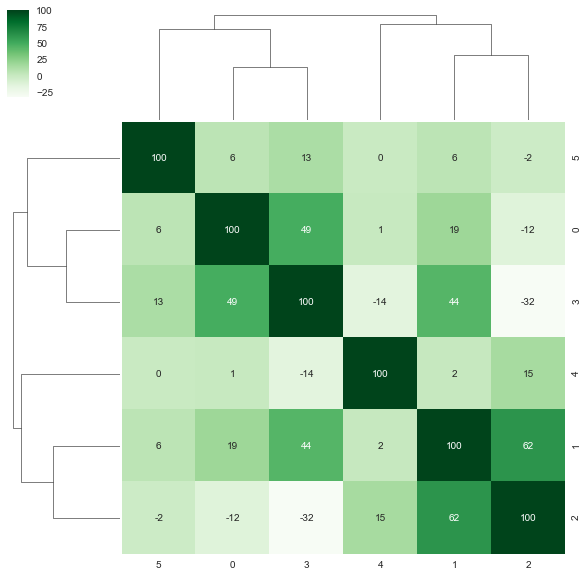

In [17]:
# Analyse the PCA transformed data: we have now 6 PCA + original features
Xpca=np.vstack((Xpca_g1[:,0],Xpca_g2[:,0],Xpca_g3[:,0],
                Xpca_g4[:,0],df_2.iloc[:,idx[32:35]].T)).T
df_Xpca=pd.DataFrame(Xpca)
corr_Xpca = df_Xpca.corr().mul(100).astype(int)
clustergrid = sns.clustermap(data=corr_Xpca, annot=True, fmt='d', 
                             cmap='Greens')
plt.show()

In [18]:
# select low-redshift z<0.3 ('Mcz') MB ('BjMAG') 
# and M280 ('S280MAG') p 242 Feigelson's textbook
df_3=df_2[['Mcz','BjMAG','S280MAG']]
df_3 = df_3[df_3['Mcz'] < 0.3]
x_3 = df_3['BjMAG']
y_3 = df_3['S280MAG']-df_3['BjMAG']

In [19]:
# Two-dimensional kernel-density estimator
# input x,y are the locations of the points, here the galaxies
# return a density map at grid locations xx,yy
from sklearn.neighbors import KernelDensity
def kde2D(x,y,bandwidth=0.1,xbins=100j,ybins=100j,**kwargs):
    # create grid of sample locatios (default: 100x100)
    xx,yy = np.mgrid[x.min():x.max():xbins,
                    y.min():y.max():ybins]
    
    xy_sample = np.vstack([yy.ravel(),xx.ravel()]).T
    xy_train = np.vstack([y,x]).T
    kde_skl = KernelDensity(bandwidth=bandwidth,**kwargs)
    kde_skl.fit(xy_train)
    # score_Samples() returns the log_likelihood of the samples
    z = np.exp(kde_skl.score_samples(xy_sample))
    return xx,yy,np.reshape(z,xx.shape)

In [20]:
from astroML.density_estimation import KNeighborsDensity
#help("astroML.density_estimation.KNeighborsDensity")
def knd2D(x,y,method='bayesian',nneighbours=5,xbins=100j,ybins=100j):
    # create grid of sample locatios (default: 100x100)
    xx,yy = np.mgrid[x.min():x.max():xbins,
                    y.min():y.max():ybins]
    xy_sample = np.vstack([yy.ravel(),xx.ravel()]).T
    xy_train = np.vstack([y,x]).T
    knn = KNeighborsDensity(method,nneighbours)
    z = knn.fit(xy_train).eval(xy_sample)
    return xx,yy,np.reshape(z,xx.shape)

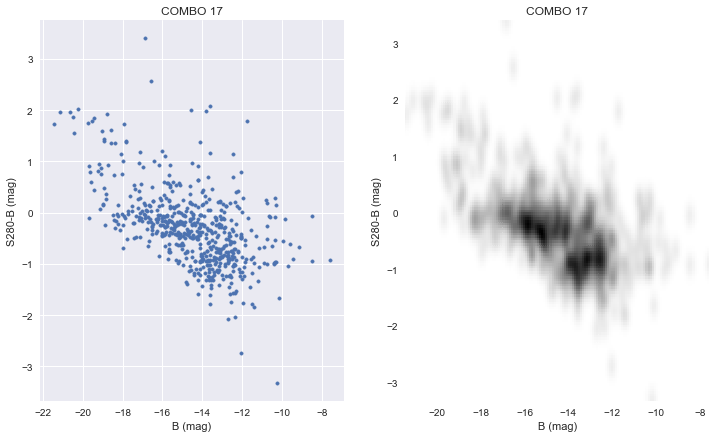

In [21]:
def density_plots():
    splot= plt.subplots(figsize=(12, 7))
    splot = plt.subplot(121)
    plt.scatter(x_3,y_3,marker='.')
    plt.xlabel('B (mag)')
    plt.ylabel('S280-B (mag)')
    plt.title("COMBO 17")
    splot = plt.subplot(122)
    plt.pcolormesh(xx,yy,zz,cmap=plt.cm.binary)
    plt.xlabel('B (mag)')
    plt.ylabel('S280-B (mag)')
    plt.title("COMBO 17")
    plt.show()
    
xx,yy,zz = kde2D(x_3,y_3,bandwidth=0.15,xbins=150j,ybins=150j)
density_plots()

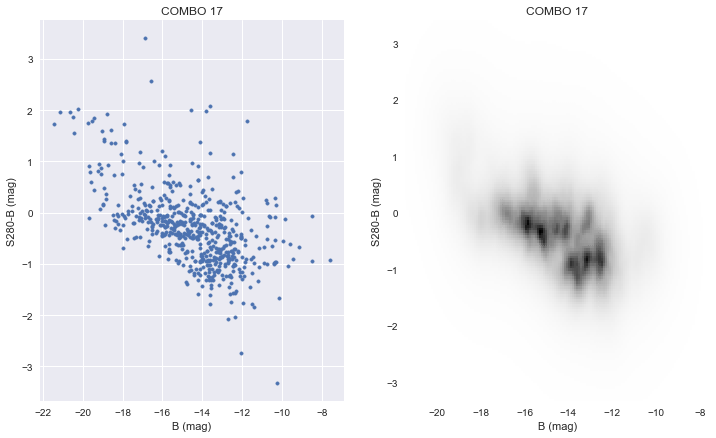

In [22]:
xx,yy,zz = knd2D(x_3,y_3,nneighbours=20,xbins=150j,ybins=150j)
density_plots()

In [23]:
col_list = ['blue','red','green','darkgoldenrod','darkgreen',
        'darkmagenta','silver','darkorange','gold',
        'darkorchid','aqua','cadetblue',
        'darkolivegreen','burlywood','chartreuse',
        'chocolate','coral','cornflowerblue','black',
        'darkkhaki','pink','moccasin','limegreen']

def plot_clustering(title):
    plt.subplots(figsize=(8, 5))
    plt.subplot(111)
    plt.scatter(x_3,y_3,alpha=0.5,marker=".")
    plt.title(title)
    for i in range(n_clusters_):
        plt.scatter(x_3[labels == i],y_3[labels == i],
                    alpha=0.5,marker=".",color=col_list[i])
        plt.xlabel('B (mag)')
        plt.ylabel('S280-B (mag)')
    plt.show()

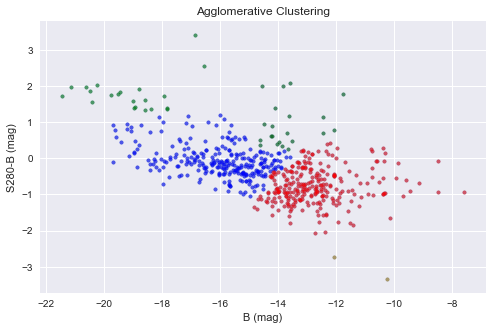

In [24]:
from sklearn.preprocessing import StandardScaler
X_3 = np.vstack((x_3,y_3))
X_3=X_3.T
X_3s = StandardScaler().fit_transform(X_3)
from sklearn.cluster import AgglomerativeClustering
#help("sklearn.cluster.AgglomerativeClustering")
# affinity: "euclidean", "l1", "l2", "manhattan", "cosine", or 'precomputed'
n_clusters_ = 5
ACmodel = AgglomerativeClustering(n_clusters=n_clusters_,
                                  affinity='euclidean',
                                  linkage='complete')
ACmodel.fit(X_3s)
labels = ACmodel.labels_
plot_clustering("Agglomerative Clustering")

In [25]:
from sklearn.cluster import DBSCAN
#help("sklearn.cluster.DBSCAN")

The dbscan function requires user input of two parameters: the minimum number of points in a cluster, and the maximum radius (or reach) of a cluster. By trial-and-error, Feigelson found that a minimum of five points within 0.3 standardized magnitude units provided a useful result.

Estimated number of clusters: 2


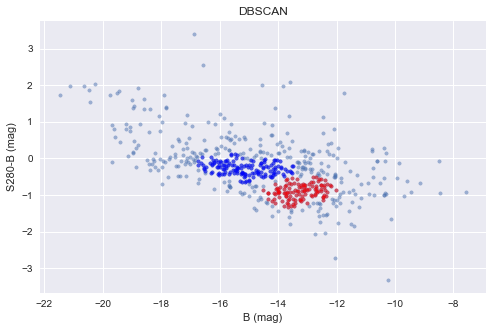

In [26]:
db = DBSCAN(eps=0.25,min_samples=25).fit(X_3s)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
plot_clustering("DBSCAN")

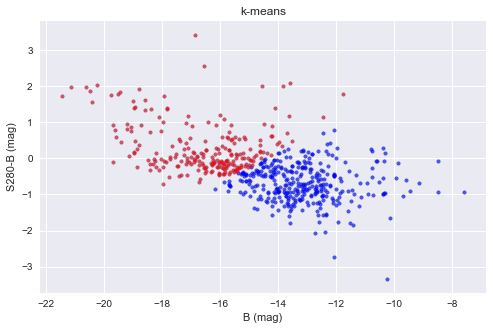

In [27]:
from sklearn.cluster import KMeans
n_clusters_ = 2
k_means = KMeans(n_clusters=n_clusters_)
k_means.fit(X_3s)
labels = k_means.labels_
plot_clustering('k-means')

Estimated number of clusters: 2
Silhouette Coefficient: 0.589


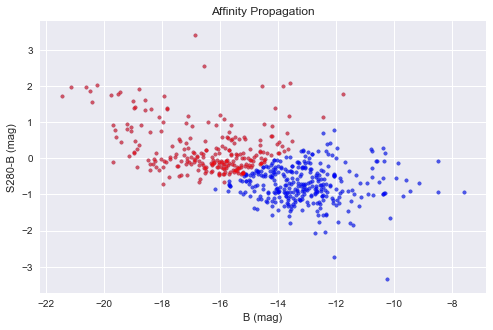

In [28]:
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_score
# Compute Affinity Propagation
af = AffinityPropagation(damping=.9,preference=-200).fit(X_3s)
cluster_centers_indices = af.cluster_centers_indices_
af_labels = af.labels_
n_clusters_ = len(cluster_centers_indices)
print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % silhouette_score(X_3s, af_labels, metric='sqeuclidean'))
labels = af_labels
plot_clustering("Affinity Propagation")

#### Future work: classical multivariate analysis:
-  based on the assumption that the data come from a multivariate normal distribution
- One of the tests for multinormality: Mardia's multivariate skewness and kurtosis statistics


#### Reference:
- Mardia K. V. (1970) Measures of multivariate skewness and kurtosis with applications Biometrika 57, 519-530
- Mardia  K. V. (1974) Applications of some measures of multivariate skewness and kurtosis in testing normlaity and robustness studies. Sankhya, B36, 115-128
- Stevens J. (1992) Applied Multivariate Statistics for Social Sciences 2nd ed. New-Jersey: Lawrance